In [11]:
import pandas as pd

# Abrindo base de dados e analisando informações iniciais
df = pd.read_csv("house_price_regression_dataset.csv")
display(df.head())
display(df.info())
display(df.describe())

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


None

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


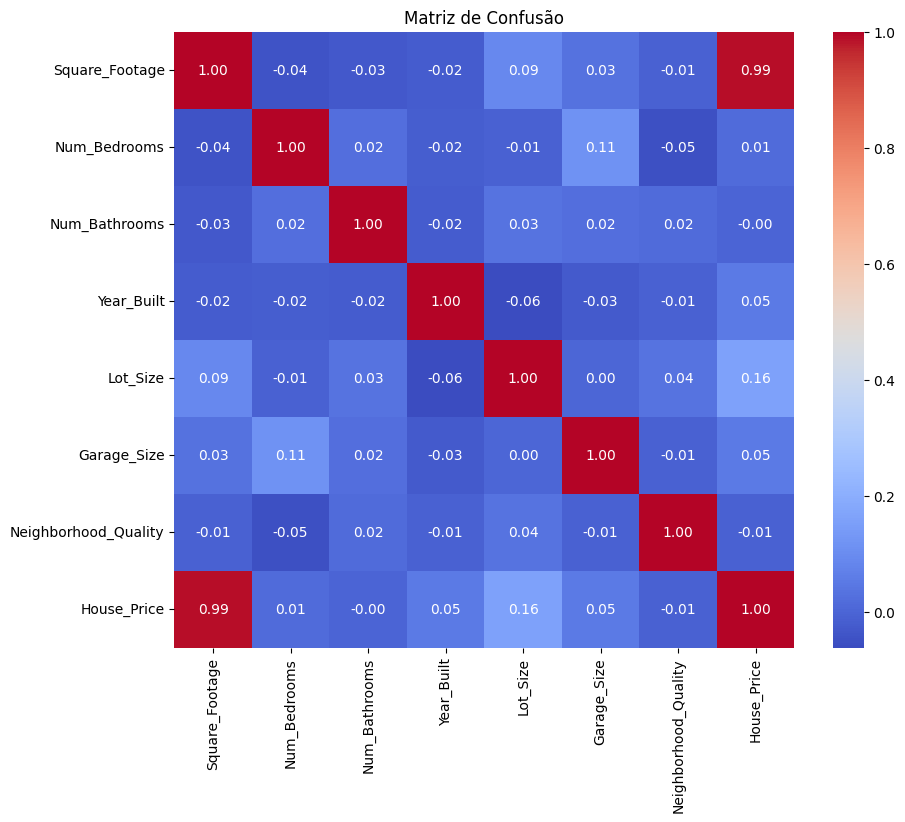

In [12]:
import seaborn as sns  
import matplotlib.pyplot as plt

# Vamos gerar a matriz de Correlação para explorar a correlação entre váriaveis e como elas influenciam no preço:
corr_matrix = df.corr()

# Visualização da matriz através de um heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Confusão")
plt.show()

C:\Users\Kaique\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Kaique\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


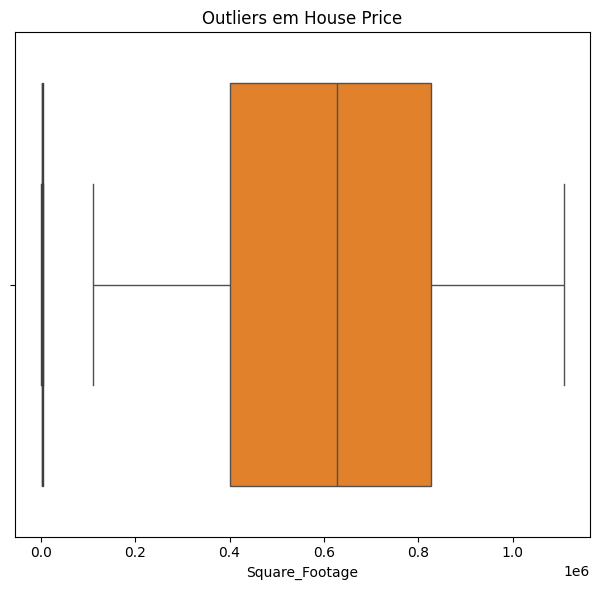

In [13]:
# Gráfico para a visualização de outliers tendo em vista que outliers podem impactar quando for feito o modelo de Machine learning
plt.figure(figsize=(12, 6))


# Blox pot para  a variável Square_Footage
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Square_Footage'])
plt.title("Outliers em Square Footage")




# Boxplot para a variável Square Footage
plt.subplot(1,2,1)
sns.boxplot(x=df["House_Price"])
plt.title("Outliers em House Price")

plt.tight_layout()
plt.show()

C:\Users\Kaique\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


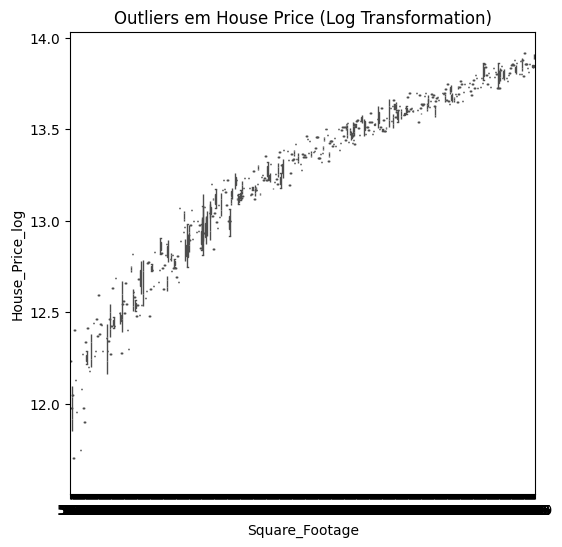

In [14]:
# Decidi agora Realizar uma transformação logaritimica  que irá reduzir a variância de valor, comprimindo grandes valores
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Aplicar a transformação logarítmica na variável House_Price
df['House_Price_log'] = np.log(df['House_Price'])

# Visualizar a nova distribuição após a transformação
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['House_Price_log'], x=df['Square_Footage'], color="orange")
plt.title('Outliers em House Price (Log Transformation)')
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# Separando Váriaveis dependentes das independentes 
X = df[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size', 'Garage_Size', 'Neighborhood_Quality']]
y_log = df['House_Price_log']


In [16]:
# Dividindo os dados de treino e teste 
X_Train, X_Test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)


In [17]:
#Ajustando o modelo de regressão linear

model = LinearRegression()
model.fit(X_Train, y_train)


LinearRegression()

In [18]:
# Fazendo as previsões
y_pred_log = model.predict(X_Test)

In [19]:
# Revertendo a transformação logaritimica para os valores preditos
y_pred = np.exp(y_pred_log)
y_test_original = np.exp(y_test)


In [20]:
# Avaliando o modelo
mae = mean_absolute_error(y_test_original, y_pred)
mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print(f"Mean absolute error (MAE): {mae}")
print(f"Mean squared error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean absolute error (MAE): 51521.83428356767
Mean squared error (MSE): 4485183820.453318
R-squared (R²): 0.9304178816814201


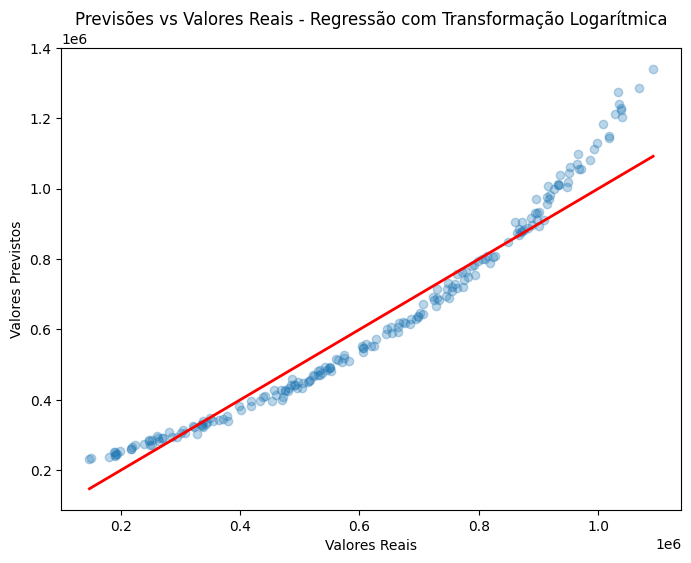

In [21]:
# Gráfico para a análise final de dados previstos e dados reais 
import matplotlib.pyplot as plt

# Plotando as previsões vs valores reais
plt.figure(figsize=(8,6))
plt.scatter(y_test_original, y_pred, alpha=0.3)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], color='red', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Previsões vs Valores Reais - Regressão com Transformação Logarítmica')
plt.show()

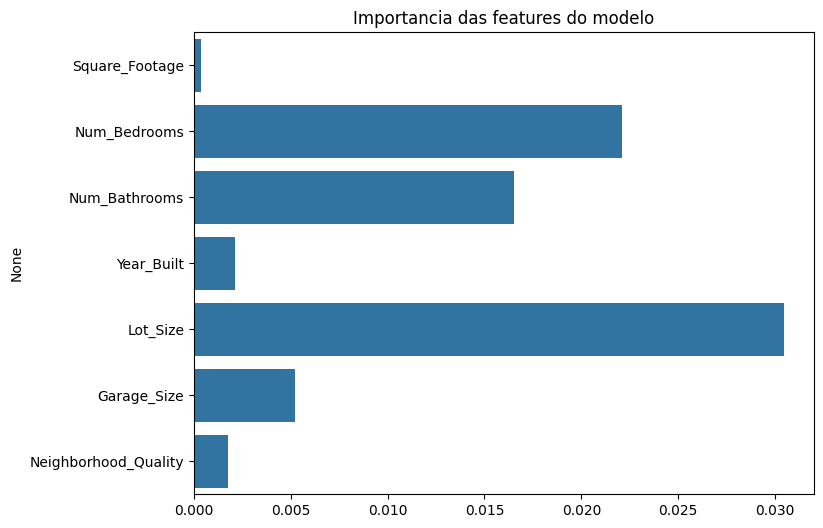

In [22]:
# Análise de feature importance 

# Coeficientes do modelo de regressão
coef = pd.Series(model.coef_, index=X.columns)

# Visualizando os coeficientes
plt.figure(figsize=(8,6))
sns.barplot(x=coef.values, y=coef.index)
plt.title("Importancia das features do modelo")
plt.show()